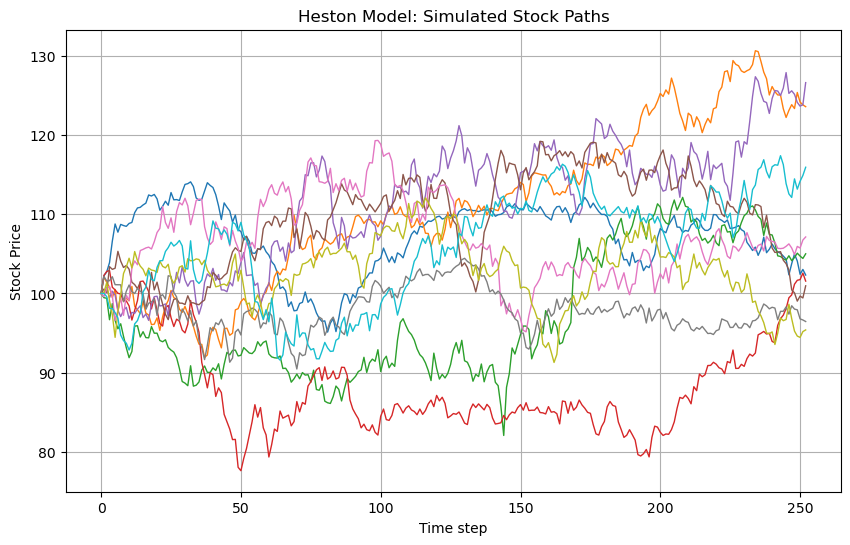

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Heston model parameters
S0 = 100        # Initial stock price
v0 = 0.04       # Initial variance (volatility^2)
mu = 0.0        # Drift (set to 0 for risk-neutral)
kappa = 2.0     # Rate of mean reversion
theta = 0.04    # Long-run variance
xi = 0.3        # Vol of vol
rho = -0.7      # Correlation between asset and vol

T = 1.0         # Time to maturity
N = 252         # Number of time steps
dt = T / N
n_paths = 10    # Number of paths

# Arrays to hold paths
S = np.zeros((n_paths, N + 1))
v = np.zeros((n_paths, N + 1))
S[:, 0] = S0
v[:, 0] = v0

# Generate correlated Brownian motions
for i in range(n_paths):
    np.random.seed(i)  # For reproducibility
    Z1 = np.random.normal(size=N)
    Z2 = np.random.normal(size=N)
    W1 = Z1
    W2 = rho * Z1 + np.sqrt(1 - rho**2) * Z2

    for t in range(1, N + 1):
        # Ensure variance stays positive
        v_prev = max(v[i, t-1], 0)
        v[i, t] = v[i, t-1] + kappa * (theta - v_prev) * dt + xi * np.sqrt(v_prev) * np.sqrt(dt) * W2[t - 1]
        v[i, t] = max(v[i, t], 0)  # Reflect at 0

        S[i, t] = S[i, t-1] * np.exp((mu - 0.5 * v_prev) * dt + np.sqrt(v_prev) * np.sqrt(dt) * W1[t - 1])

# Plot sample paths
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(S[i], lw=1)
plt.title('Heston Model: Simulated Stock Paths')
plt.xlabel('Time step')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()